In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [65]:
T=1
M=100
N=1000

def simple_a(x):
    return np.array((x-1/3)*(x-2/3))

def pos_a(x):
    a_vec=simple_a(x)
    null_vec=np.zeros(len(x))
    arr=np.maximum(null_vec, a_vec)
    return arr

def neg_a(x):
    null_vec=np.zeros(len(x))
    a_vec=-simple_a(x)
    arr=np.maximum(null_vec, a_vec)
    return arr
        
def tridiag(lower, diag, upper):
    return np.diag(lower, -1) + np.diag(diag) + np.diag(upper, 1)    

def plot_solutionTest(U, angle=-30, title="Title"):
    x_len = len(U[:, ])
    t_len = len(U[0])
    
    x=np.linspace(0, 1, x_len) 
    t=np.linspace(0, T, t_len)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), subplot_kw={"projection": "3d"})
    tt, xx = np.meshgrid(t, x)
    ax.plot_surface(tt, xx, U, cmap=cm.coolwarm)
    ax.view_init(azim=angle)              # Rotate the figure
    ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('u')
    fig.tight_layout()
    
def RHS(tt, xx):
    t ,x =np.meshgrid(tt, xx)
    return 2*np.pi*simple_a(x)*np.cos(2*np.pi*x)*np.exp(-t**2) - 2*t*np.sin(2*np.pi*x)*np.exp(-t**2)

def v_exact_func(t, x):
    return np.sin(2*np.pi*x)*np.exp(-t**2)

In [90]:
def init_test(x):
    return np.sin(2*np.pi*x) #x**2 #np.exp(-(x-2)*(x-2)) # 1-np.sin(2*np.pi*x)*x**2 

def init_noRHS(x):
    return np.exp(-(x-2)*(x-2))

def bc_test(t):
    return  v_exact_func(t,0) #init_test(-simple_a(0)*t)

def LAX_Wendroff(M, T, N, u_init, u_bc):
    
    h=1/M
    k=T/N
    
    t=np.linspace(0, T, N+1)
    x=np.linspace(0, 1, M+1)
    
    U=np.zeros((M+1, N+1))
    
    U[:, 0]=u_init(x)
    U[0, :]=u_bc(t)
    r = k/h*(pos_a(x)[:] - neg_a(x)[:])
    
    lower=1/2*(r**2 + r)[1:]
    middle=np.ones(len(x))-r**2
    upper=1/2*(r**2-r)[:-1]
    
    A=tridiag(lower, middle, upper)
    CFL=k/h*simple_a(x)
    
    F=RHS(t, x)
    
    for n in range(N):
        
        U[:, n+1]=A@U[:, n]  + k*F[:, n]
        U[M, n+1] = 2*U[M-1,n+1] - U[M-2,n+1]

    return U, x, t, np.max(np.abs(r))


def error_func_h(u_exact_method, scheme):
    Ms=np.arange(2,10,1)
    hs=1/Ms
    t=np.linspace(0, T, N+1)
    error= np.zeros(len(hs))
    for i in range(len(Ms)):
        u_numeric, temp1, temp2, temp3 = scheme(Ms[i], T, N, init_test, bc_test)
        x = np.linspace(0, 1, Ms[i]+1)
        tt, xx = np.meshgrid(t,x)
        u_exact = u_exact_method(tt, xx)
        error[i] = np.max( np.abs(u_numeric[-1,:] - u_exact[-1,:] ))
    order = np.polyfit(np.log(hs),np.log(error),1)[0]
    return hs, error , order



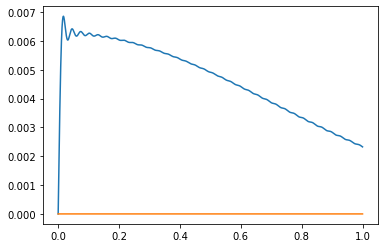

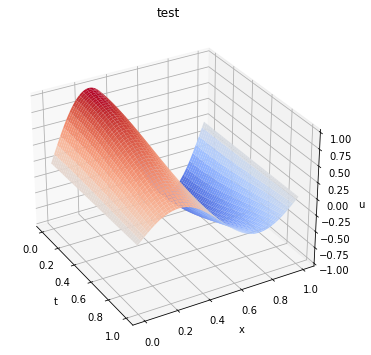

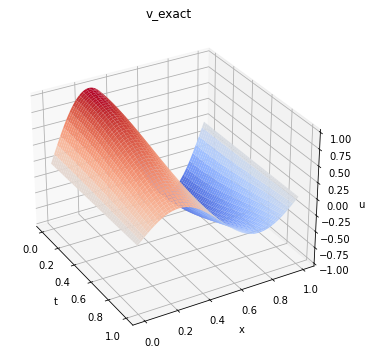

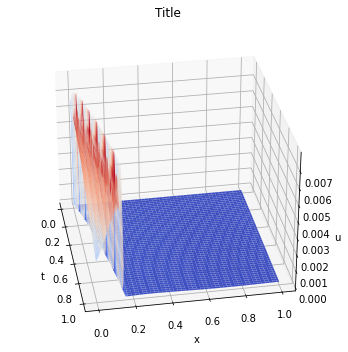

In [91]:
T=1
M=1000
N=10000

test, testx, testt, CFL=LAX_Wendroff(M, T, N, init_test, bc_test)

#noRHS, noRHSx, noRHSt, noRHSCFL=LAX_Wenderoff(M, T, N, init_noRHS, bc_test)

#plot_solutionTest(noRHS, ,title="Solution")




xxx=np.linspace(0, 1, M+1)   
ttt=np.linspace(0, T, N+1)
tt, xx = np.meshgrid(ttt,xxx)
v_exact = v_exact_func(tt,xx)

plt.figure()
plt.plot(ttt,test[0,:])
plt.plot(ttt,v_exact[0,:])
plt.show()

plot_solutionTest(test, angle=-30, title="test")

plot_solutionTest(v_exact, angle=-30, title="v_exact")


comp = test-v_exact
plot_solutionTest(comp, angle=-10 )



In [92]:
t=np.linspace(0, T, N+1)
p = v_exact_func(t, 0)


x=np.linspace(0, 1, M+1)
    
U=np.zeros((M+1, N+1))
print(p)
print(bc_test(t))
print(init_test(x))

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[ 0.00000000e+00  6.28314397e-03  1.25660399e-02 ... -1.25660399e-02
 -6.28314397e-03 -2.44929360e-16]


Order:0.9677530633884555


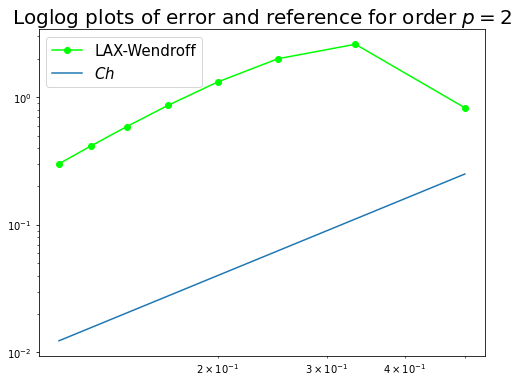

In [44]:
hs, error, order = error_func_h(v_exact_func,LAX_Wendroff)

print("Order:" + str(order))

plt.figure(figsize=(8,6))
plt.title(r'Loglog plots of error and reference for order $p=2$', fontsize=20)
plt.loglog(hs, error,'o-', linestyle='-', color="lime", label="LAX-Wendroff")
plt.loglog(hs, hs**2, label=r'$Ch$')
plt.legend(fontsize=15)
plt.show()



